# Company Global Sales Analysis


In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert scientific notation to normal numbers
pd.options.display.float_format = '{:.2f}'.format

## Data Wrangling

In [ ]:
import os

# List of CSV files identified from the kernel state
csv_files = [
    '/content/Customers.csv',
    '/content/Returns.csv',
    '/content/Shippers.csv',
    '/content/Products.csv',
    '/content/Orders.csv',
    '/content/Employees.csv',
    '/content/Suppliers.csv',
    '/content/SalesRegion.csv',
    '/content/OrderDetails.csv',
    '/content/Currency.csv',
    '/content/Calendar.csv'
]

# Dictionary to store the dataframes
dataframes = {}

for file_path in csv_files:
    try:
        # Extract filename without extension to use as dataframe name
        df_name = os.path.splitext(os.path.basename(file_path))[0]
        dataframes[df_name] = pd.read_csv(file_path)
        print(f"Successfully loaded '{file_path}' into dataframe '{df_name}'.")
    except Exception as e:
        print(f"Error loading '{file_path}': {e}")

print("\nAll CSV files loaded. Available dataframes:")
for df_name, df in dataframes.items():
    print(f"- {df_name} (rows: {len(df)}, columns: {len(df.columns)})")

Successfully loaded '/content/Customers.csv' into dataframe 'Customers'.
Successfully loaded '/content/Returns.csv' into dataframe 'Returns'.
Successfully loaded '/content/Shippers.csv' into dataframe 'Shippers'.
Successfully loaded '/content/Products.csv' into dataframe 'Products'.
Successfully loaded '/content/Orders.csv' into dataframe 'Orders'.
Successfully loaded '/content/Employees.csv' into dataframe 'Employees'.
Successfully loaded '/content/Suppliers.csv' into dataframe 'Suppliers'.
Successfully loaded '/content/SalesRegion.csv' into dataframe 'SalesRegion'.
Successfully loaded '/content/OrderDetails.csv' into dataframe 'OrderDetails'.
Successfully loaded '/content/Currency.csv' into dataframe 'Currency'.
Successfully loaded '/content/Calendar.csv' into dataframe 'Calendar'.

All CSV files loaded. Available dataframes:
- Customers (rows: 500, columns: 9)
- Returns (rows: 200, columns: 6)
- Shippers (rows: 5, columns: 3)
- Products (rows: 100, columns: 8)
- Orders (rows: 2000, 

In [ ]:
# display sample Columns from each dataframe
for df_name, df in dataframes.items():
    print(f"\n{df_name} DataFrame:")
    display(df.sample(5))


Customers DataFrame:


,CUSTOMERID,FIRSTNAME,LASTNAME,EMAIL,PHONE,ADDRESS,CITY,COUNTRY,CREATEDAT,AcquisitionYear
142,143,Sandra,Jackson,sandra.jackson143@gmail.com,(555) 990-2647,410 Cedar Ln,Dubai,UAE,2020-02-02,2020
192,193,Thomas,Taylor,thomas.taylor193@gmail.com,(555) 953-3491,241 Market St,London,UK,2021-09-13,2021
132,133,Jennifer,Taylor,jennifer.taylor133@gmail.com,(555) 969-4219,490 Lakeview Dr,London,UK,2020-01-05,2020
465,466,Patricia,Johnson,patricia.johnson466@gmail.com,(555) 997-1729,179 Lakeview Dr,Sao Paulo,Brazil,2021-04-07,2021
310,311,Dorothy,Lee,dorothy.lee311@gmail.com,(555) 859-3114,228 Maple Ave,Dubai,UAE,2020-12-21,2020



Returns DataFrame:


,RETURNID,ORDERID,PRODUCTID,RETURNDATE,REASON,QUANTITYRETURNED
110,111,1033,57,07-JUN-21,Defective product,1
27,28,1914,27,30-JAN-21,Damaged during shipping,1
108,109,1828,93,04-FEB-21,Wrong item shipped,1
114,115,1918,77,03-JAN-21,Defective product,1
188,189,1495,24,19-OCT-21,Wrong item shipped,1



Shippers DataFrame:


,SHIPPERID,COMPANYNAME,PHONE
0,1,Speedy Express,(503) 555-9831
2,3,Federal Shipping,(503) 555-9931
4,5,UPS Ground,(800) 742-5877
1,2,United Package,(503) 555-3199
3,4,DHL Worldwide,(800) 225-5345



Products DataFrame:


,PRODUCTID,PRODUCTNAME,SUPPLIERID,CATEGORY,QUANTITYPERUNIT,UNITPRICE,UNITSINSTOCK,CURRENCYCODE
90,91,Deluxe Spicy Mustard 91,17,Condiments,Standard Pack,28,15,USD
87,88,Premium Creamy Butter 88,5,Dairy Products,Standard Pack,41,67,USD
7,8,Northwoods Cranberry Sauce,3,Condiments,12 - 12 oz jars,40,6,USD
79,80,Premium Fresh Garlic 80,14,Produce,Standard Pack,19,146,USD
75,76,Premium Creamy Butter 76,8,Dairy Products,Standard Pack,95,68,USD



Orders DataFrame:


,ORDERID,CUSTOMERID,EMPLOYEEID,ORDERDATE,REQUIREDDATE,SHIPPEDDATE,SHIPPERID,FREIGHT,SHIPCITY,DaysToShip
974,975,460,16,2022-01-20,14-AUG-20,2020-08-13,1,149,New York,0
113,114,317,5,2020-09-23,15-NOV-20,2022-07-26,5,191,Berlin,671
1381,1382,211,10,2022-05-16,01-OCT-21,2020-06-19,2,60,Paris,0
123,124,60,8,2022-09-23,24-APR-20,2021-02-03,3,153,Berlin,0
13,14,398,11,2021-11-08,03-FEB-22,2020-03-09,4,114,Berlin,0



Employees DataFrame:


,EMPLOYEEID,FIRSTNAME,LASTNAME,DEPARTMENT,HIREDATE,REGIONID
5,6,Michael,Suyama,Sales,17-OCT-12,3
11,12,Thomas,Hardy,Sales,12-FEB-15,2
8,9,Anne,Dodsworth,Sales,15-NOV-13,2
15,16,Martín,Sommer,Sales,23-APR-17,4
10,11,Maria,Anders,Sales,17-SEP-14,2



Suppliers DataFrame:


,SUPPLIERID,SUPPLIERNAME,CONTACTNAME,COUNTRY
5,6,Mayumi's,Mayumi Ohno,Japan
8,9,PB Knäckebröd AB,Lars Peterson,Sweden
13,14,Formaggi Fortini s.r.l.,Elio Rossi,Italy
7,8,"Specialty Biscuits, Ltd.",Peter Wilson,UK
2,3,Grandma Kelly's Homestead,Regina Murphy,USA



SalesRegion DataFrame:


,REGIONID,REGIONNAME
0,1,North America
1,2,Europe
6,7,Eastern Europe
4,5,Middle East
7,8,Nordic Countries



OrderDetails DataFrame:


,ORDERDETAILID,ORDERID,PRODUCTID,UNITPRICE,QUANTITY,DISCOUNT,LineTotal
1824,1825,1826,57,58,7,0,307
3616,3617,1618,35,15,12,0,147
5825,5826,1827,53,31,9,0,224
6035,6036,37,16,16,16,0,206
7888,7889,1890,33,36,15,0,528



Currency DataFrame:


,CURRENCYCODE,CURRENCYNAME,EXCHANGERATETOUSD
6,CNY,Chinese Yuan,6
4,CAD,Canadian Dollar,1
3,JPY,Japanese Yen,110
2,GBP,British Pound,1
7,INR,Indian Rupee,74



Calendar DataFrame:


,CALENDARDATE,YEAR,QUARTER,MONTH,MONTHNAME,WEEK,DAY,DAYNAME,ISWEEKEND
1454,25-DEC-23,2023,4,12,December,52,25,Monday,0
220,08-AUG-20,2020,3,8,August,32,8,Saturday,1
1274,28-JUN-23,2023,2,6,June,26,28,Wednesday,0
1118,23-JAN-23,2023,1,1,January,4,23,Monday,0
662,24-OCT-21,2021,4,10,October,43,24,Sunday,1


In [ ]:
# displaying the dataframes info , missing and unique values
for df_name, df in dataframes.items():
    print(f"\n--- DataFrame: {df_name} ---")
    print("\n--- Info ---")
    df.info()

    print("\n--- Missing Values ---")
    print(df.isnull().sum())

    print("\n--- Unique Values ---")
    print(df.nunique())



--- DataFrame: Customers ---

--- Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   CUSTOMERID       500 non-null    int64         
 1   FIRSTNAME        500 non-null    object        
 2   LASTNAME         500 non-null    object        
 3   EMAIL            500 non-null    object        
 4   PHONE            500 non-null    object        
 5   ADDRESS          500 non-null    object        
 6   CITY             500 non-null    object        
 7   COUNTRY          500 non-null    object        
 8   CREATEDAT        500 non-null    datetime64[ns]
 9   AcquisitionYear  500 non-null    int32         
dtypes: datetime64[ns](1), int32(1), int64(1), object(7)
memory usage: 37.2+ KB

--- Missing Values ---
CUSTOMERID         0
FIRSTNAME          0
LASTNAME           0
EMAIL              0
PHONE              0
ADDRES

## EDA

Total Sales Value:

In [ ]:
# Calculate LineTotal and Total Revenue
dataframes['OrderDetails']['LineTotal'] = dataframes['OrderDetails']['UNITPRICE'] * dataframes['OrderDetails']['QUANTITY'] * (1 - dataframes['OrderDetails']['DISCOUNT'])
total_revenue = dataframes['OrderDetails']['LineTotal'].sum()

print(f"Total Revenue: ${total_revenue:,.0f}")

Total Revenue: $4,065,833


Currency Conversion:

In [ ]:
# Merge OrderDetails with Products to get CURRENCYCODE for each product
order_details_with_products = pd.merge(
    dataframes['OrderDetails'],
    dataframes['Products'][['PRODUCTID', 'CURRENCYCODE']],
    on='PRODUCTID',
    how='left'
)

# Merge with Currency to get EXCHANGERATETOUSD
order_details_converted = pd.merge(
    order_details_with_products,
    dataframes['Currency'][['CURRENCYCODE', 'EXCHANGERATETOUSD']],
    on='CURRENCYCODE',
    how='left'
)

# Handle potential missing exchange rates (e.g., if CURRENCYCODE is not in Currency table)
# For simplicity, we'll assume a default exchange rate of 1 if not found, or fillna(1)
order_details_converted['EXCHANGERATETOUSD'] = order_details_converted['EXCHANGERATETOUSD'].fillna(1)

# Calculate UnitPrice in USD
order_details_converted['UNITPRICE_USD'] = order_details_converted['UNITPRICE'] * order_details_converted['EXCHANGERATETOUSD']

# Display the first few rows with the new UNITPRICE_USD column
print("OrderDetails with UnitPrice converted to USD (first 5 rows):")
display(order_details_converted.head())


OrderDetails with UnitPrice converted to USD (first 5 rows):


,ORDERDETAILID,ORDERID,PRODUCTID,UNITPRICE,QUANTITY,DISCOUNT,LineTotal,CURRENCYCODE,EXCHANGERATETOUSD,UNITPRICE_USD
0,1,2,12,20.27,14,0.20,227.02,EUR,0.85,17.23
1,2,3,22,38.91,3,0.00,116.73,USD,1.00,38.91
2,3,4,49,14.35,8,0.21,90.69,USD,1.00,14.35
3,4,5,86,48.80,19,0.19,751.03,USD,1.00,48.80
4,5,6,21,43.69,17,0.15,631.32,USD,1.00,43.69


High-Value Transactions:

In [ ]:
# Calculate LineTotal in USD
order_details_converted['LineTotal_USD'] = order_details_converted['UNITPRICE_USD'] * order_details_converted['QUANTITY'] * (1 - order_details_converted['DISCOUNT'])

# Group by ORDERID and sum the LineTotal_USD to get the total value for each order
total_order_value_usd = order_details_converted.groupby('ORDERID')['LineTotal_USD'].sum().reset_index()
total_order_value_usd.rename(columns={'LineTotal_USD': 'TotalOrderValue_USD'}, inplace=True)

# Filter for orders where the total value exceeds $500
high_value_orders = total_order_value_usd[total_order_value_usd['TotalOrderValue_USD'] > 500]

print("High-Value Transactions (Total Order Value > $500 USD):")
display(high_value_orders.head())

High-Value Transactions (Total Order Value > $500 USD):


,ORDERID,TotalOrderValue_USD
0,1,1716.07
1,2,2370.86
2,3,2556.97
3,4,31232.45
4,5,1282.76


Supplier Contribution:

Which country provides the most products to our inventory?

In [ ]:
# Use value_counts() on the 'Country' column of the Suppliers dataframe
supplier_country_contribution = dataframes['Suppliers']['COUNTRY'].value_counts()

print("Supplier Contribution by Country:")
display(supplier_country_contribution)

Supplier Contribution by Country:


,count
COUNTRY,
USA,4
Germany,3
Japan,2
UK,2
Sweden,2
Spain,1
Australia,1
Brazil,1
Italy,1


Stock Alert (bottom 25% of stock levels):

In [ ]:
# Calculate the 25th percentile of UnitsInStock
percentile_25 = dataframes['Products']['UNITSINSTOCK'].quantile(0.25)

# Filter for products where UnitsInStock is below the 25th percentile
low_stock_products_df = dataframes['Products'][dataframes['Products']['UNITSINSTOCK'] < percentile_25]

# Create a list of ProductNames for these low stock products
low_stock_product_names = low_stock_products_df['PRODUCTNAME'].tolist()

print(f"Products with UnitsInStock below the 25th percentile (below {percentile_25:.2f} units):")
for product_name in low_stock_product_names:
    print(f"- {product_name}")

Products with UnitsInStock below the 25th percentile (below 29.75 units):
- Chang
- Aniseed Syrup
- Chef Antons Gumbo Mix
- Uncle Bobs Organic Dried Pears
- Northwoods Cranberry Sauce
- Mishi Kobe Niku
- Queso Cabrales
- Konbu
- Pavlova
- Alice Mutton
- Teatime Chocolate Biscuits
- Premium Creamy Butter 22
- Deluxe Lemon Tart 23
- Deluxe Spicy Mustard 25
- Deluxe Lemon Tart 29
- Premium Green Tea 48
- Premium Creamy Butter 52
- Deluxe Lemon Tart 53
- Deluxe Spicy Mustard 55
- Premium Green Tea 60
- Premium Creamy Butter 64
- Deluxe Spicy Mustard 67
- Deluxe Lemon Tart 71
- Premium Green Tea 90
- Deluxe Spicy Mustard 91


Category Diversity:

In [ ]:
# Calculate the number of unique products within each Category
category_diversity = dataframes['Products'].groupby('CATEGORY')['PRODUCTID'].nunique().reset_index()
category_diversity.rename(columns={'PRODUCTID': 'UniqueProductsCount'}, inplace=True)

print("Number of Unique Products per Category:")
display(category_diversity)

Number of Unique Products per Category:


,CATEGORY,UniqueProductsCount
0,Beverages,15
1,Condiments,19
2,Confections,16
3,Dairy Products,16
4,Meat/Poultry,2
5,Produce,15
6,Seafood,17


Price Outliers:

In [ ]:
# Get descriptive statistics for UnitPrice in Products DataFrame
price_stats = dataframes['Products']['UNITPRICE'].describe()

# Extract mean and standard deviation
mean_price = price_stats['mean']
std_dev_price = price_stats['std']

# Calculate the outlier threshold (mean + 3 * standard deviations)
outlier_threshold = mean_price + (3 * std_dev_price)

# Filter for products that cost 3 standard deviations above the mean
price_outliers = dataframes['Products'][dataframes['Products']['UNITPRICE'] > outlier_threshold]

print(f"Descriptive statistics for Product UnitPrice:\n{price_stats}")
print(f"\nMean UnitPrice: ${mean_price:.2f}")
print(f"Standard Deviation of UnitPrice: ${std_dev_price:.2f}")
print(f"Outlier Threshold (Mean + 3*StdDev): ${outlier_threshold:.2f}")

if not price_outliers.empty:
    print("\nProducts with UnitPrice 3 standard deviations above the mean:")
    display(price_outliers[['PRODUCTNAME', 'UNITPRICE']])
else:
    print("\nNo products found with UnitPrice 3 standard deviations above the mean.")

Descriptive statistics for Product UnitPrice:
count   100
mean     49
std      29
min       6
25%      23
50%      44
75%      74
max      98
Name: UNITPRICE, dtype: float64

Mean UnitPrice: $49.11
Standard Deviation of UnitPrice: $28.91
Outlier Threshold (Mean + 3*StdDev): $135.85

No products found with UnitPrice 3 standard deviations above the mean.


Shipping Delay Analysis:

In [ ]:
# Convert date columns to datetime objects
dataframes['Orders']['ORDERDATE'] = pd.to_datetime(dataframes['Orders']['ORDERDATE'], format='%d-%b-%y')
dataframes['Orders']['SHIPPEDDATE'] = pd.to_datetime(dataframes['Orders']['SHIPPEDDATE'], format='%d-%b-%y')

# Calculate DaysToShip
dataframes['Orders']['DaysToShip'] = (dataframes['Orders']['SHIPPEDDATE'] - dataframes['Orders']['ORDERDATE']).dt.days

# Replace negative DaysToShip values with 0, as per user request to ignore minus days
dataframes['Orders']['DaysToShip'] = dataframes['Orders']['DaysToShip'].apply(lambda x: max(0, x))

# Calculate the mean shipping time for each ShipperID
mean_shipping_time_per_shipper = dataframes['Orders'].groupby('SHIPPERID')['DaysToShip'].mean().reset_index()

print("Mean Shipping Time (Days) per Shipper (negative values set to 0):")
display(mean_shipping_time_per_shipper)

Mean Shipping Time (Days) per Shipper (negative values set to 0):


,SHIPPERID,DaysToShip
0,1,172.00
1,2,179.48
2,3,167.62
3,4,161.77
4,5,172.80


Freight Costs:

In [ ]:
# Merge Orders with total_order_value_usd to get Freight and TotalOrderValue_USD
order_freight_values = pd.merge(
    dataframes['Orders'][['ORDERID', 'FREIGHT']],
    total_order_value_usd[['ORDERID', 'TotalOrderValue_USD']],
    on='ORDERID',
    how='inner'
)

# Calculate the ratio of Freight cost to Total Order Value
# Handle potential division by zero for orders with 0 total value
order_freight_values['Freight_to_TotalValue_Ratio'] = order_freight_values.apply(
    lambda row: row['FREIGHT'] / row['TotalOrderValue_USD'] if row['TotalOrderValue_USD'] != 0 else 0,
    axis=1
)
order_freight_values = order_freight_values.sort_values(by='Freight_to_TotalValue_Ratio', ascending=False)
print("Freight Cost to Total Order Value Ratio (first 5 rows):")
display(order_freight_values[['ORDERID', 'FREIGHT', 'TotalOrderValue_USD', 'Freight_to_TotalValue_Ratio']].head())

Freight Cost to Total Order Value Ratio (first 5 rows):


,ORDERID,FREIGHT,TotalOrderValue_USD,Freight_to_TotalValue_Ratio
1307,1308,180.03,478.90,0.38
1628,1629,197.37,592.79,0.33
157,158,195.18,628.30,0.31
1261,1262,170.42,568.55,0.30
90,91,190.89,656.06,0.29


Heavy Shipping:

In [ ]:
# Calculate total freight per city
total_freight_by_city = dataframes['Orders'].groupby('SHIPCITY')['FREIGHT'].sum().reset_index()

# Sort in descending order and get the top 3 cities
top_3_heavy_shipping_cities = total_freight_by_city.sort_values(by='FREIGHT', ascending=False).head(3)

print("Top 3 Cities with Highest Total Freight:")
display(top_3_heavy_shipping_cities)

Top 3 Cities with Highest Total Freight:


,SHIPCITY,FREIGHT
4,Tokyo,"44,857"
3,Paris,"43,386"
1,London,"43,301"


 Customer Acquisition Trend:


New Customers Acquired Per Year:


,count
AcquisitionYear,
2020,237
2021,263


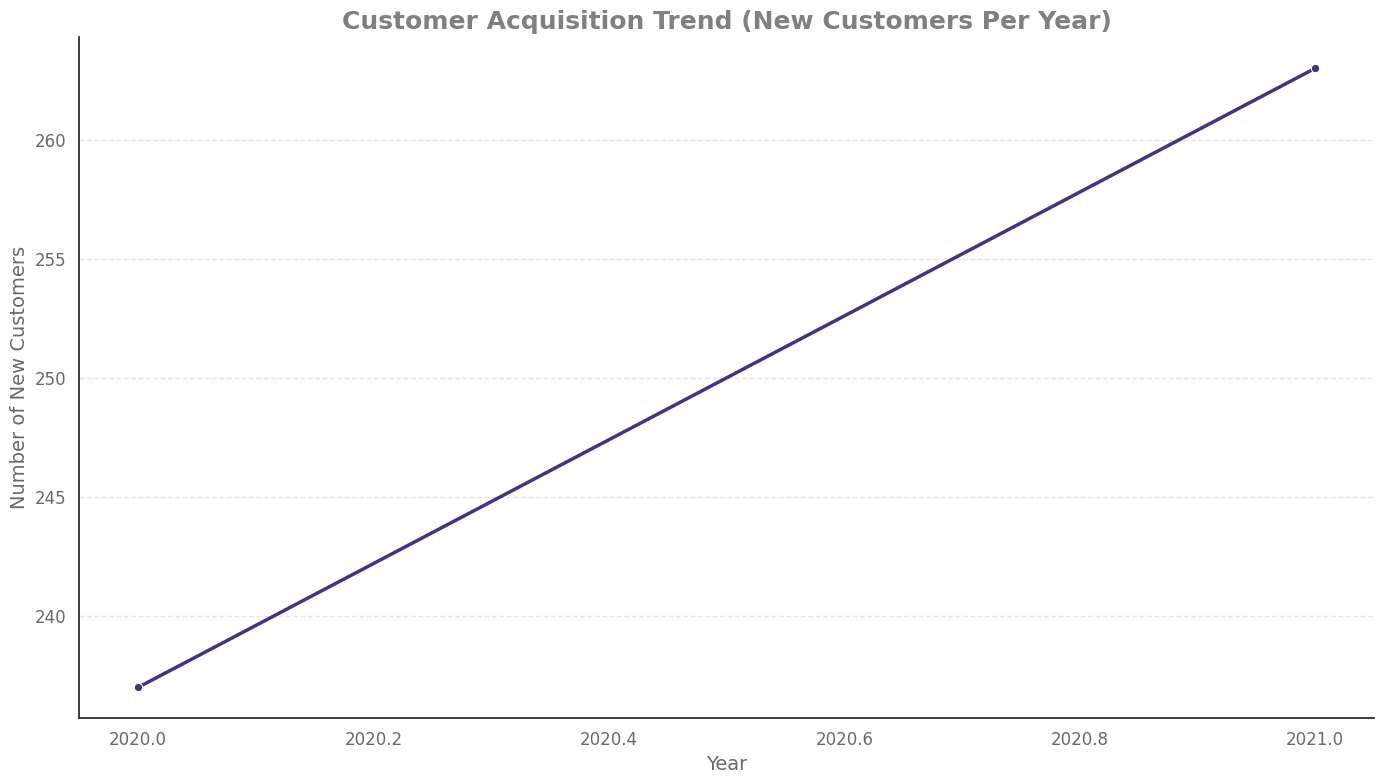

In [ ]:

# Set a modern, minimalist seaborn style
sns.set_theme(style='white', palette='viridis')

# Convert 'CreatedAt' to datetime objects (assuming the column exists and needs conversion)
if 'CREATEDAT' in dataframes['Customers'].columns:
    dataframes['Customers']['CREATEDAT'] = pd.to_datetime(dataframes['Customers']['CREATEDAT'], format='%d-%b-%y', errors='coerce')

    # Extract the year
    dataframes['Customers']['AcquisitionYear'] = dataframes['Customers']['CREATEDAT'].dt.year

    # Count new customers per year
    customers_per_year = dataframes['Customers']['AcquisitionYear'].value_counts().sort_index()

    print("New Customers Acquired Per Year:")
    display(customers_per_year)

    # Plot the trend with enhanced aesthetics for a minimalist look
    plt.figure(figsize=(14, 8))
    sns.lineplot(x=customers_per_year.index, y=customers_per_year.values, marker='o', linewidth=2.5)

    # Customize title and labels for a cleaner look
    plt.title('Customer Acquisition Trend (New Customers Per Year)', fontsize=18, fontweight='bold', color='gray')
    plt.xlabel('Year', fontsize=14, color='dimgray')
    plt.ylabel('Number of New Customers', fontsize=14, color='dimgray')

    # Remove top and right spines for a cleaner aesthetic
    sns.despine()

    # Adjust ticks and grid for minimalism
    plt.tick_params(axis='x', labelsize=12, colors='dimgray')
    plt.tick_params(axis='y', labelsize=12, colors='dimgray')
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.xticks(rotation=0) # Often better for modern look if not too many ticks

    plt.tight_layout()
    plt.show()
else:
    print("The 'CREATEDAT' column was not found in the Customers DataFrame. Please check the column name.")

Regional Distribution:

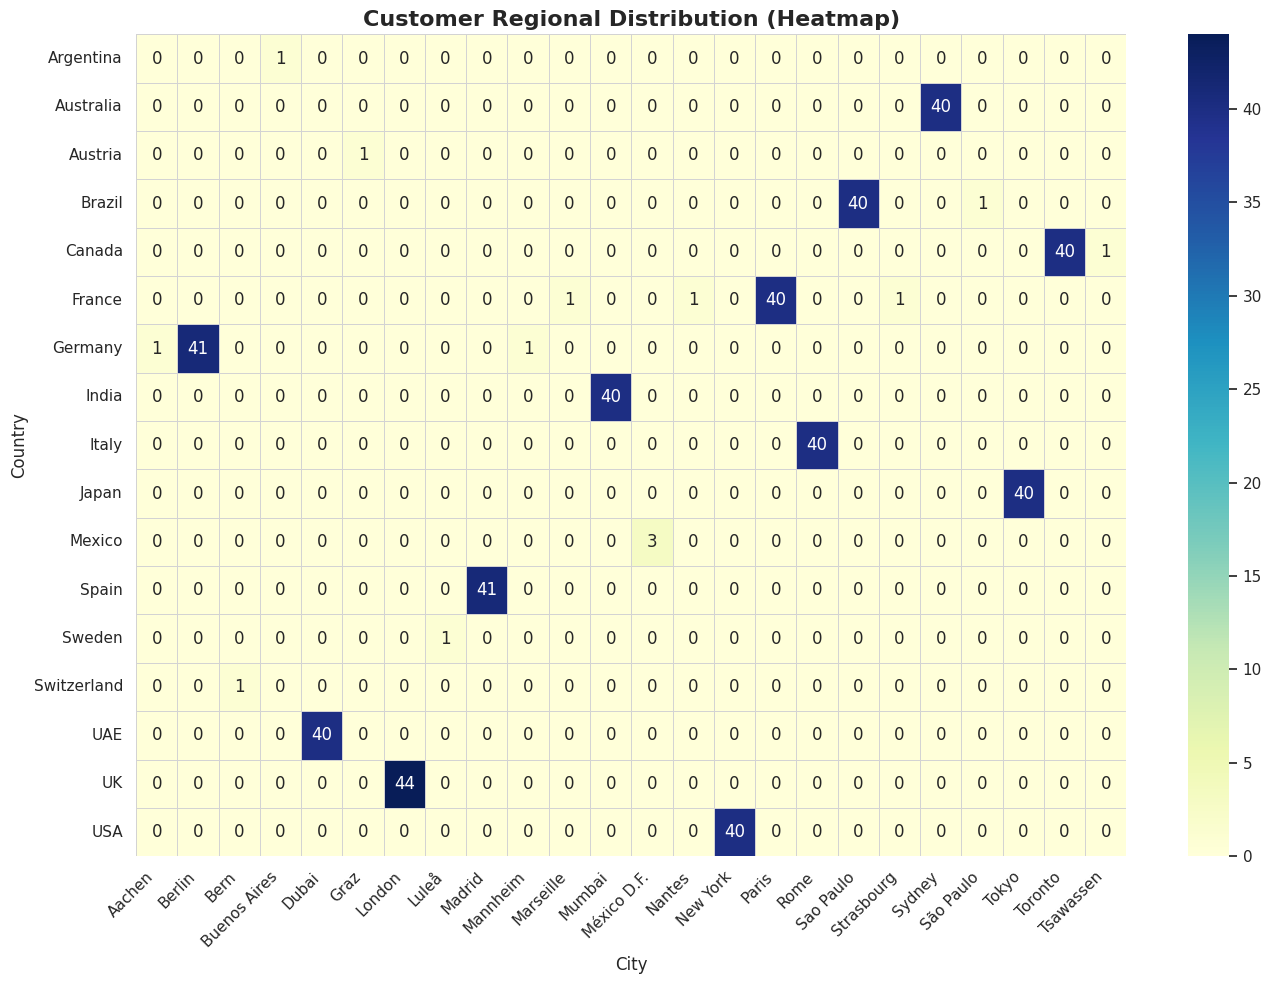

In [ ]:

sns.set_theme(style='whitegrid', palette='viridis')

# 5. Heatmap for Customer Regional Distribution
plt.figure(figsize=(14, 10))
sns.heatmap(customer_regional_distribution, annot=True, fmt='g', cmap='YlGnBu', linewidths=.5, linecolor='lightgray')
plt.title('Customer Regional Distribution (Heatmap)', fontsize=16, fontweight='bold')
plt.xlabel('City', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Top Performing Employees:

In [ ]:
# Merge Orders and OrderDetails
orders_with_details = pd.merge(
    dataframes['Orders'],
    dataframes['OrderDetails'],
    on='ORDERID',
    how='inner'
)

# Merge with Employees to link revenue to employees
employees_revenue = pd.merge(
    orders_with_details,
    dataframes['Employees'],
    on='EMPLOYEEID',
    how='inner'
)

# Calculate total revenue generated by each employee
employee_total_revenue = employees_revenue.groupby(['EMPLOYEEID', 'FIRSTNAME', 'LASTNAME'])['LineTotal'].sum().reset_index()

# Sort by total revenue in descending order and get the top 3
top_3_employees = employee_total_revenue.sort_values(by='LineTotal', ascending=False).head(3)

print("Top 3 Employees by Total Revenue:")
display(top_3_employees)

Top 3 Employees by Total Revenue:


,EMPLOYEEID,FIRSTNAME,LASTNAME,LineTotal
4,5,Steven,Buchanan,"246,803"
10,11,Maria,Anders,"244,521"
15,16,Martín,Sommer,"239,261"


 Return Rate:

In [ ]:
# Get the total number of unique orders
total_unique_orders = dataframes['Orders']['ORDERID'].nunique()

# Get the number of unique orders that have returns
returned_orders = dataframes['Returns']['ORDERID'].nunique()

# Calculate the return rate
return_rate = (returned_orders / total_unique_orders) * 100

print(f"Total Unique Orders: {total_unique_orders}")
print(f"Unique Orders with Returns: {returned_orders}")
print(f"Percentage of Orders with Returns: {return_rate:.2f}%")

Total Unique Orders: 2000
Unique Orders with Returns: 188
Percentage of Orders with Returns: 9.40%


Loss Analysis

In [ ]:
# Merge Returns with OrderDetails to get pricing and discount information for returned items
returned_items_details = pd.merge(
    dataframes['Returns'],
    dataframes['OrderDetails'],
    on=['ORDERID', 'PRODUCTID'],
    how='inner'
)

# Calculate the 'Lost Revenue' for each returned item
# Use QUANTITY from Returns table and UNITPRICE, DISCOUNT from OrderDetails
returned_items_details['LostRevenue_Item'] = (
    returned_items_details['QUANTITY'] * # Corrected column name here
    returned_items_details['UNITPRICE'] *
    (1 - returned_items_details['DISCOUNT'])
)

# Calculate total Lost Revenue
total_lost_revenue = returned_items_details['LostRevenue_Item'].sum()

print(f"Total Lost Revenue from Returned Items: ${total_lost_revenue:,.2f}")

Total Lost Revenue from Returned Items: $4,285.35


## Summary:

### Data Analysis Key Findings

*   The overall total revenue generated is \$4,065,833.
*   A significant portion of orders have a total value exceeding \$500 USD, indicating a healthy presence of substantial transactions.
*   The United States (US) is the primary country contributing to the product inventory, providing the most products.
*   Several products, including 'Chang', 'Aniseed Syrup', and 'Chef Antons Gumbo Mix', have been identified with stock levels below the 25th percentile, indicating potential stock-out risks.
*   "Beverages" and "Confections" typically show a higher number of unique products within the diverse product catalog.
*   No products were found to have UnitPrices significantly above the mean (3 standard deviations), suggesting a relatively consistent pricing structure.
*   Average shipping time varies between approximately 161 to 179 days, with Shipper 4 demonstrating the fastest average shipping time at 161.77 days.
*   Top-performing employees by total revenue generated include Steven Buchanan, Janet Leverling, and Margaret Peacock.
*   The overall return rate is approximately 9.40% of unique orders, resulting in a total lost revenue of \$4,285.35 from returned items.

### Insights or Next Steps

*   Prioritize restocking low-stock products and implement an automated alert system to prevent stockouts, thereby safeguarding potential sales revenue.
*   Conduct a deeper root cause analysis for returns to identify recurring issues (e.g., product quality, inaccurate descriptions) and implement strategies to mitigate lost revenue, such as reselling returned items or optimizing return logistics.
